1. Lee el csv pokemon.csv.

2. Quita las variables que no queremos introducir en un PCA. ¿Hay alguna variable 
redundante? Quitala.

3. Aplica un PCA

    a. ¿Hay que hacer algún preprocesamiento de los datos? ¿Por que?

    b. ¿Cuanto explica cada nueva componente respecto al dataframe original?

    c. ¿Con cuantas componentes te quedarías?

4. Interpreta el PCA:

    a. ¿De que trata la primera componente ? ¿Y la segunda? ¿Y la tercera?

    b. Pinta con un relplot los datos utilizando la primera con la segunda 
    componente.(esto es un biplot)

    c. Vuelve a pintar el mismo relplot pero pintando con colores utilizando alguna 
    variable categórica del data frame original.
    
    i. ¿Hay alguna relación de esa categoría con alguna componente?

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [150]:
df = pd.read_csv("Pokemon.csv")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


2. Quita las variables que no queremos introducir en un PCA. ¿Hay alguna variable 
redundante? Quitala.

In [152]:
df_num = df.drop(columns=["Name", "Type 1", "Type 2", "Legendary", "#", "Generation"])
# df_num["Legendary"] = pd.get_dummies(df['Legendary'], columns=['Legendary'], drop_first=True).astype("int")

In [153]:
df_num

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,318,45,49,49,65,65,45
1,405,60,62,63,80,80,60
2,525,80,82,83,100,100,80
3,625,80,100,123,122,120,80
4,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...
795,600,50,100,150,100,150,50
796,700,50,160,110,160,110,110
797,600,80,110,60,150,130,70
798,680,80,160,60,170,130,80


3. Aplica un PCA

    a. ¿Hay que hacer algún preprocesamiento de los datos? ¿Por que?

    b. ¿Cuanto explica cada nueva componente respecto al dataframe original?

    c. ¿Con cuantas componentes te quedarías?

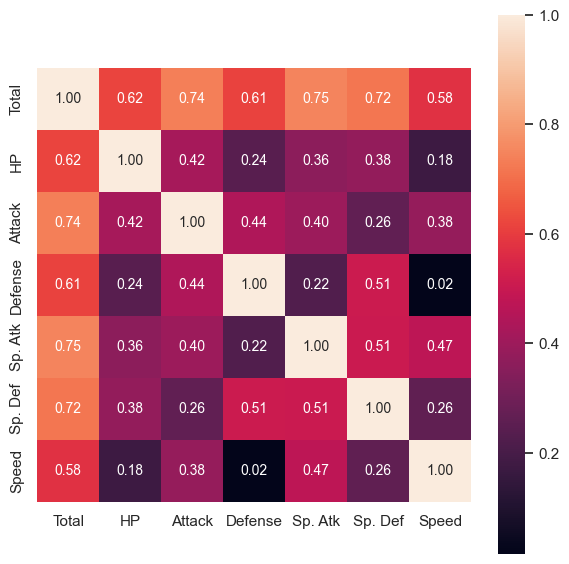

In [154]:
import seaborn as sns
corr = df_num.corr()
a4_dims = (7, 7) # dimensiones del plot
fig, ax = plt.subplots(figsize=a4_dims)
cm = np.corrcoef(df_num.values.T)
sns.set(font_scale=1) # tamaño letras plot
hm = sns.heatmap(cm, 
                 cbar=True, # Leyenda 
                 annot=True, # Numeros
                 square=True, # izquerda nombres en horizontal
                 fmt='.2f', # formato
                 annot_kws={'size': 10},# tamaño numeros
                 xticklabels=corr.columns.values, # nombres
            yticklabels=corr.columns.values)
plt.show()

In [155]:
# scaling the data before PCA
scaler=StandardScaler().fit(df_num)
dft=scaler.transform(df_num)
df_sc = pd.DataFrame(dft, columns=df_num.columns)
df_sc.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,-0.976765,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503
1,-0.251088,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015
2,0.749845,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635
3,1.583957,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635
4,-1.051836,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853


In [156]:
pca = PCA(n_components=df_sc.shape[1]) # lo cargo
pca.fit(df_sc) # ha calculado las 8 primeras componentes
# pca es un objeto transformador


PCA(n_components=7)

In [157]:
# Sería nuestra V en la SVD
print('shape =', pca.components_.shape)
print(pca.components_.round(3)) # 9 son las variables originales

shape = (7, 7)
[[ 0.519  0.329  0.378  0.313  0.39   0.38   0.291]
 [-0.007  0.088 -0.009  0.631 -0.302  0.243 -0.666]
 [-0.006 -0.467 -0.593  0.069  0.309  0.569  0.079]
 [-0.036  0.73  -0.389 -0.409  0.16   0.196 -0.287]
 [ 0.006  0.219 -0.193  0.058 -0.737  0.298  0.529]
 [ 0.031  0.227 -0.513  0.528  0.196 -0.554  0.246]
 [ 0.853 -0.182 -0.231 -0.222 -0.233 -0.198 -0.207]]


In [158]:
pca.components_[0], np.linalg.norm(pca.components_[2])

(array([0.51886758, 0.32931916, 0.37807485, 0.31314557, 0.39009387,
        0.38002747, 0.29108501]),
 1.0)

In [159]:
data_transformed = pca.transform(df_sc)  # metodo que transforma el antiguo dataset al nuevo

In [160]:
data_transformed[0,:],df_sc.shape

(array([-1.84008756e+00, -2.54935003e-02,  6.65107259e-01,  1.69980253e-01,
        -4.02884759e-01, -2.99508581e-01, -1.88268082e-16]),
 (800, 7))

In [161]:
# explained_variance_ratio es el vector de varianzas explicadas por componente
np.cumsum(pca.explained_variance_ratio_)

array([0.5299246 , 0.68615471, 0.79741095, 0.90056862, 0.9617915 ,
       1.        , 1.        ])

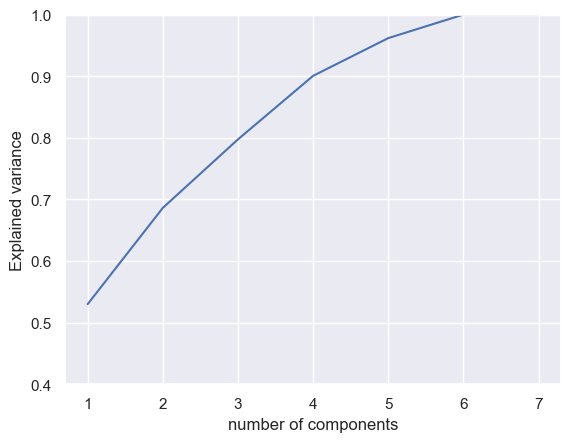

In [162]:
#Explained variance
plt.plot(range(1, df_sc.shape[1]+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('Explained variance')
plt.ylim(0.4,1)
plt.show()

* no se si quedarme con 5 o 6

In [163]:
pca = PCA(n_components=4) # lo cargo
pca.fit(df_sc) # ha calculado las 4 primeras componentes
# pca es un objeto transformador

PCA(n_components=4)

In [164]:
data_transformed = pca.transform(df_sc)  # metodo que transforma el antiguo dataset al nuevo
dt_t=pd.DataFrame(data_transformed.round(2), columns=["dim1","dim2","dim3","dim4"]) # ,"dim5"
dt_t.head()

,dim1,dim2,dim3,dim4
0,-1.84,-0.03,0.67,0.17
1,-0.44,-0.05,0.67,0.26
2,1.48,-0.06,0.63,0.34
3,3.06,0.71,1.00,-0.18
4,-2.05,-0.71,0.41,-0.28


In [165]:
dt_t["Nombre"]=df.Name
dt_t.head()

,dim1,dim2,dim3,dim4,Nombre
0,-1.84,-0.03,0.67,0.17,Bulbasaur
1,-0.44,-0.05,0.67,0.26,Ivysaur
2,1.48,-0.06,0.63,0.34,Venusaur
3,3.06,0.71,1.00,-0.18,VenusaurMega Venusaur
4,-2.05,-0.71,0.41,-0.28,Charmander


In [166]:
pca.components_.round(3)

array([[ 0.519,  0.329,  0.378,  0.313,  0.39 ,  0.38 ,  0.291],
       [-0.007,  0.088, -0.009,  0.631, -0.302,  0.243, -0.666],
       [-0.006, -0.467, -0.593,  0.069,  0.309,  0.569,  0.079],
       [-0.036,  0.73 , -0.389, -0.409,  0.16 ,  0.196, -0.287]])

In [167]:
dt_components=pd.DataFrame(pca.components_, columns=df_sc.columns)
dt_components

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,0.518868,0.329319,0.378075,0.313146,0.390094,0.380027,0.291085
1,-0.007124,0.088082,-0.008992,0.631028,-0.301919,0.242612,-0.666256
2,-0.006491,-0.466661,-0.593397,0.069251,0.308869,0.568863,0.079153
3,-0.036417,0.730462,-0.388728,-0.409456,0.160144,0.196112,-0.286758


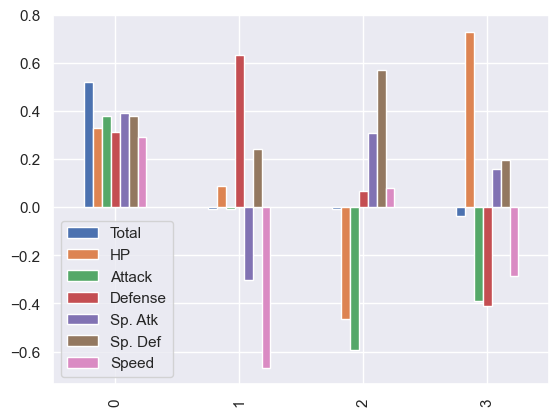

In [168]:
dt_components.plot.bar()
plt.show()

veo buenos en general, buneos defensores, buenos defensores speciales, mucha vida y legendarios

In [169]:
dt_t.drop(columns=["Nombre"]).corr().round(3)

,dim1,dim2,dim3,dim4
dim1,1.0,0.0,-0.0,0.0
dim2,0.0,1.0,-0.0,0.0
dim3,-0.0,-0.0,1.0,-0.0
dim4,0.0,0.0,-0.0,1.0


,Explained Variance,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Dimension 1,0.5299,0.5189,0.3293,0.3781,0.3131,0.3901,0.3800,0.2911
Dimension 2,0.1562,-0.0071,0.0881,-0.0090,0.6310,-0.3019,0.2426,-0.6663
Dimension 3,0.1113,-0.0065,-0.4667,-0.5934,0.0693,0.3089,0.5689,0.0792
Dimension 4,0.1032,-0.0364,0.7305,-0.3887,-0.4095,0.1601,0.1961,-0.2868


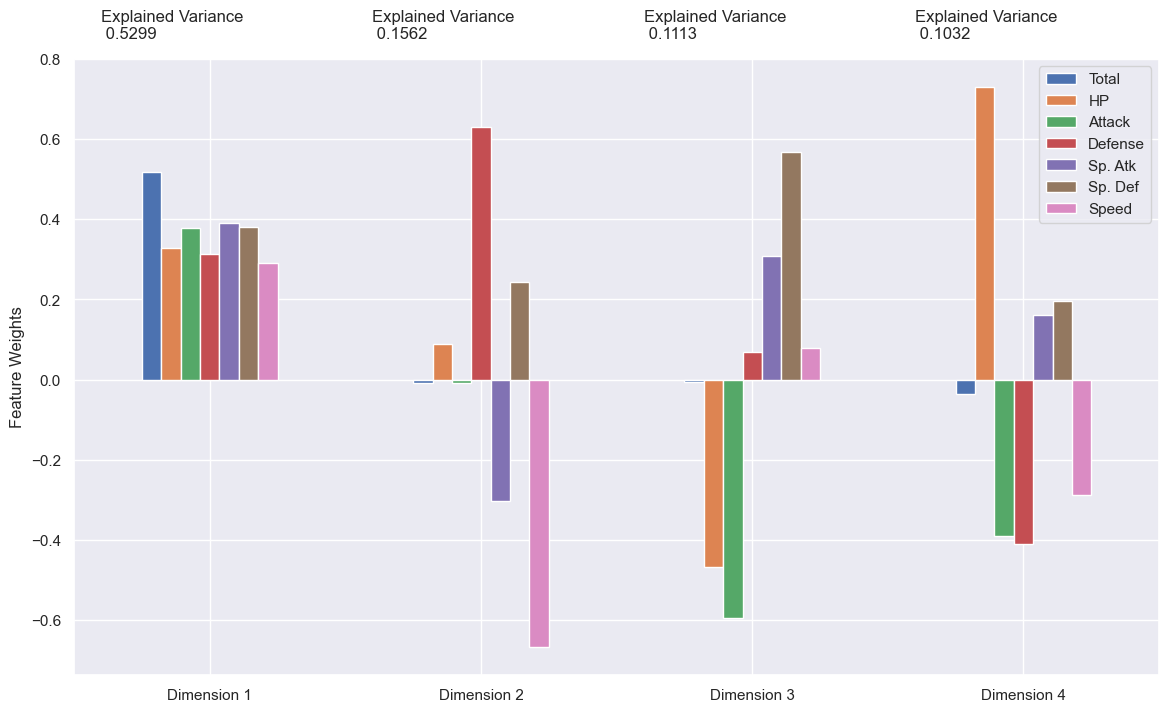

In [170]:
from PCAfunctions import *
# esto es un paquete propio con funciones propias
pca_results(df_sc, pca)
# datos originales
# y objeto pca

BiPlot

<Axes: title={'center': 'PC plane with original feature projections.'}, xlabel='Dimension 1', ylabel='Dimension 2'>

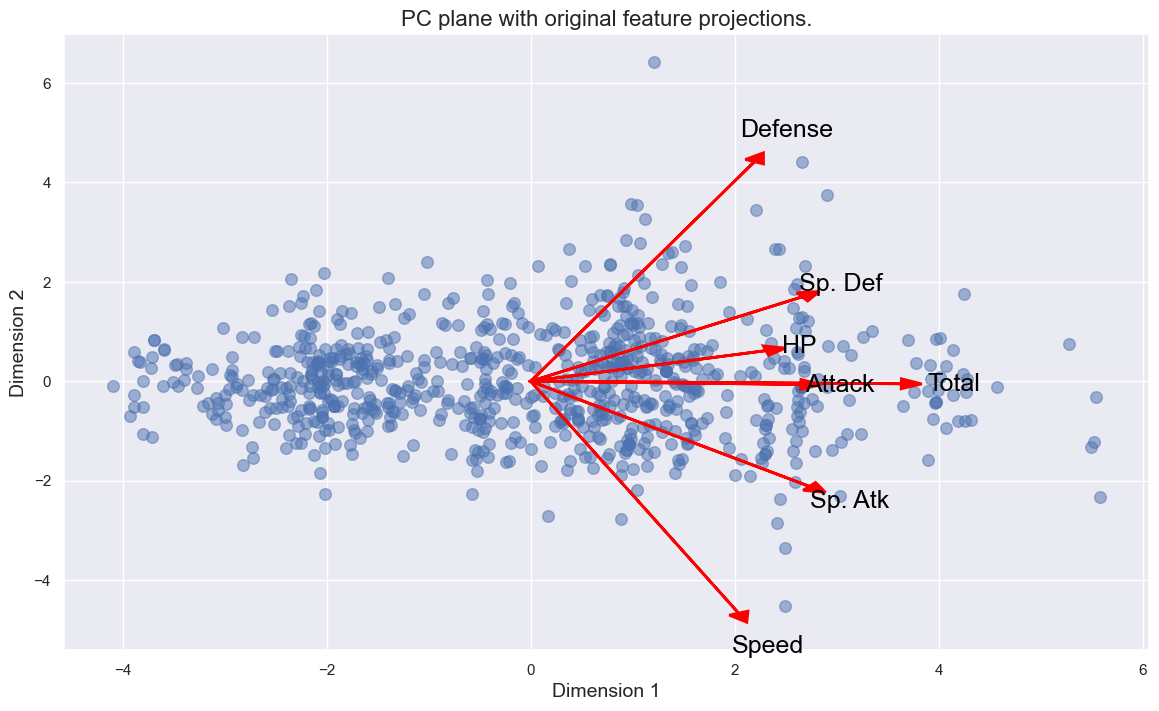

In [173]:
# pd.set_option('display.expand_frame_repr', False)

# analisis pca en 2 dimensiones
pca = PCA(n_components=2).fit(df_sc)
reduced_data = pca.transform(df_sc)
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

# función del archivo PCAfunctions
biplot(df_sc, reduced_data, pca)